<a href="https://colab.research.google.com/github/arnabsaha7/Starbucks-Data-Analysis/blob/main/Starbucks_Data_Analysis_in_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
!pip install pyspark

In [2]:
import pyspark
from pyspark import SparkConf, SparkContext

from pyspark.rdd import RDD

from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

import pyspark.sql.functions as F
from pyspark.sql.functions import udf
from pyspark.sql.functions import col,sum

from pyspark.sql.types import *
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [4]:
spark

# Data Loading

In [5]:
df = spark.read.csv('/content/starbucks.csv', header=True)
df.show(5)

+--------------------+-------------+-----------------+--------+--------------+--------------+-----------------+------------+-------------------------+----------------+------------------+-----------+-------------+-----------------+----------------+----------------+------------+-------------+
|   Beverage_category|     Beverage|    Beverage_prep|Calories| Total Fat (g)|Trans Fat (g) |Saturated Fat (g)| Sodium (mg)| Total Carbohydrates (g) |Cholesterol (mg)| Dietary Fibre (g)| Sugars (g)| Protein (g) |Vitamin A (% DV) |Vitamin C (% DV)| Calcium (% DV) |Iron (% DV) |Caffeine (mg)|
+--------------------+-------------+-----------------+--------+--------------+--------------+-----------------+------------+-------------------------+----------------+------------------+-----------+-------------+-----------------+----------------+----------------+------------+-------------+
|              Coffee|Brewed Coffee|            Short|       3|           0.1|             0|                0|           0|

# Exploratory Data Analysis (EDA)

In [10]:
print('Coffee count ',df.filter(df['Beverage_category']=="Coffee").select('Beverage_category').count())
print('Caffè Latte count ',df.filter(df['Beverage']=="Caffè Latte").select('Beverage').count())

Coffee count  4
Caffè Latte count  12


## Statistical Analysis

In [11]:
# Schema
df.printSchema()

root
 |-- Beverage_category: string (nullable = true)
 |-- Beverage: string (nullable = true)
 |-- Beverage_prep: string (nullable = true)
 |-- Calories: string (nullable = true)
 |--  Total Fat (g): string (nullable = true)
 |-- Trans Fat (g) : string (nullable = true)
 |-- Saturated Fat (g): string (nullable = true)
 |--  Sodium (mg): string (nullable = true)
 |--  Total Carbohydrates (g) : string (nullable = true)
 |-- Cholesterol (mg): string (nullable = true)
 |--  Dietary Fibre (g): string (nullable = true)
 |--  Sugars (g): string (nullable = true)
 |--  Protein (g) : string (nullable = true)
 |-- Vitamin A (% DV) : string (nullable = true)
 |-- Vitamin C (% DV): string (nullable = true)
 |--  Calcium (% DV) : string (nullable = true)
 |-- Iron (% DV) : string (nullable = true)
 |-- Caffeine (mg): string (nullable = true)



In [12]:
# Summary Stats
df.describe().show()

+-------+--------------------+--------------------+-------------+------------------+------------------+------------------+--------------------+-----------------+-------------------------+------------------+------------------+------------------+-----------------+-----------------+----------------+----------------+------------+-----------------+
|summary|   Beverage_category|            Beverage|Beverage_prep|          Calories|     Total Fat (g)|    Trans Fat (g) |   Saturated Fat (g)|      Sodium (mg)| Total Carbohydrates (g) |  Cholesterol (mg)| Dietary Fibre (g)|        Sugars (g)|     Protein (g) |Vitamin A (% DV) |Vitamin C (% DV)| Calcium (% DV) |Iron (% DV) |    Caffeine (mg)|
+-------+--------------------+--------------------+-------------+------------------+------------------+------------------+--------------------+-----------------+-------------------------+------------------+------------------+------------------+-----------------+-----------------+----------------+-----------

In [13]:
df.show()

+--------------------+--------------------+------------------+--------+--------------+--------------+-----------------+------------+-------------------------+----------------+------------------+-----------+-------------+-----------------+----------------+----------------+------------+-------------+
|   Beverage_category|            Beverage|     Beverage_prep|Calories| Total Fat (g)|Trans Fat (g) |Saturated Fat (g)| Sodium (mg)| Total Carbohydrates (g) |Cholesterol (mg)| Dietary Fibre (g)| Sugars (g)| Protein (g) |Vitamin A (% DV) |Vitamin C (% DV)| Calcium (% DV) |Iron (% DV) |Caffeine (mg)|
+--------------------+--------------------+------------------+--------+--------------+--------------+-----------------+------------+-------------------------+----------------+------------------+-----------+-------------+-----------------+----------------+----------------+------------+-------------+
|              Coffee|       Brewed Coffee|             Short|       3|           0.1|             0

In [14]:
# Unique values in categorical columns
unique_beverage_categories = df.select("Beverage_category").distinct().collect()
unique_beverages = df.select("Beverage").distinct().collect()
unique_beverage_preps = df.select("Beverage_prep").distinct().collect()

print('Unique_beverage_categories:')
for row in unique_beverage_categories:
    print(row.Beverage_category)
print()
print('Unique_beverages:')
for row in unique_beverages:
    print(row.Beverage)
print()
print('Unique_beverage_prep:')
for row in unique_beverage_preps:
    print(row.Beverage_prep)

Unique_beverage_categories:
Smoothies
Frappuccino® Blended Crème
Frappuccino® Light Blended Coffee
Frappuccino® Blended Coffee
Tazo® Tea Drinks
Coffee
Shaken Iced Beverages
Signature Espresso Drinks
Classic Espresso Drinks

Unique_beverages:
Caffè Latte
Caramel Macchiato
Brewed Coffee
Espresso
Mocha (Without Whipped Cream)
Caffè Mocha (Without Whipped Cream)
Caramel
Iced Brewed Coffee (With Milk & Classic Syrup)
Caffè Americano
Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)
Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)
Mocha
Java Chip (Without Whipped Cream)
Strawberries & Crème (Without Whipped Cream)
Vanilla Bean (Without Whipped Cream)
Tazo® Green Tea Latte
Coffee
Hot Chocolate (Without Whipped Cream)
Java Chip
Tazo® Chai Tea Latte
Tazo® Full-Leaf Tea Latte
Banana Chocolate Smoothie
Shaken Iced Tazo® Tea (With Classic Syrup)
Skinny Latte (Any Flavour)
Cappuccino
Caramel (Without Whipped Cream)
Strawberry Banana Smoothie
Vanilla Latte (Or Other Flavoured Latte)
Iced Brewed Cof

In [15]:
# Coffee
df.filter(df['Beverage_category'] == "Coffee").describe().show()

+-------+-----------------+-------------+-------------+------------------+--------------+--------------+-----------------+------------+-------------------------+----------------+------------------+-----------+------------------+-----------------+----------------+----------------+------------+------------------+
|summary|Beverage_category|     Beverage|Beverage_prep|          Calories| Total Fat (g)|Trans Fat (g) |Saturated Fat (g)| Sodium (mg)| Total Carbohydrates (g) |Cholesterol (mg)| Dietary Fibre (g)| Sugars (g)|      Protein (g) |Vitamin A (% DV) |Vitamin C (% DV)| Calcium (% DV) |Iron (% DV) |     Caffeine (mg)|
+-------+-----------------+-------------+-------------+------------------+--------------+--------------+-----------------+------------+-------------------------+----------------+------------------+-----------+------------------+-----------------+----------------+----------------+------------+------------------+
|  count|                4|            4|            4|      

# Data Cleaning and Transformation

In [6]:
df_pandas = df.toPandas()

In [7]:
## Renaming Columns
df_pandas.rename(columns ={
    ' Total Fat (g)': 'total_fat_g',
    'Trans Fat (g) ': 'trans_fat_g',
    'Saturated Fat (g)': 'saturated_fat_g',
    ' Sodium (mg)': 'sodium_mg',
    ' Total Carbohydrates (g) ': 'total_carbohydrates_g',
    'Cholesterol (mg)': 'cholesterol_mg',
    ' Dietary Fibre (g)': 'dietary_fibre_g',
    ' Sugars (g)': 'sugar_g',
    ' Protein (g) ': 'protein_g',
    'Vitamin A (% DV) ': 'Vitamin_A_DV',
    'Vitamin C (% DV)': 'Vitamin_C_DV',
    ' Calcium (% DV) ': 'calcium_DV',
    'Iron (% DV) ': 'iron_DV',
    'Caffeine (mg)': 'caffeine_mg'}, inplace=True)

In [8]:
# Converting Percentage Values

def func(val):
    if isinstance(val, str):
        val = val.replace('%', '')
    return float(val) / 100

df_pandas['Vitamin_A_DV'] = df_pandas['Vitamin_A_DV'].apply(func)
df_pandas['Vitamin_C_DV'] = df_pandas['Vitamin_C_DV'].apply(func)
df_pandas['calcium_DV'] = df_pandas['calcium_DV'].apply(func)
df_pandas['iron_DV'] = df_pandas['iron_DV'].apply(func)

In [9]:
# Handling Missing Values and Data Type Conversion

df_pandas['total_fat_g'] = df_pandas['total_fat_g'].replace('3 2', '3.2')
df_pandas['total_fat_g'] = pd.to_numeric(df_pandas['total_fat_g'], errors='coerce')

df_pandas.drop_duplicates(inplace=True)

df_pandas['caffeine_mg'].fillna('125', inplace=True)

df_pandas = df_pandas[df_pandas['caffeine_mg'].str.lower() != 'varies']
df_pandas['caffeine_mg'] = pd.to_numeric(df_pandas['caffeine_mg'], errors='coerce')


<ipython-input-9-dd906c1953c8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pandas['caffeine_mg'] = pd.to_numeric(df_pandas['caffeine_mg'], errors='coerce')


## Graphical Analysis

In [19]:
numerical_columns = ['Calories','total_fat_g','trans_fat_g','saturated_fat_g',
                     'sodium_mg','total_carbohydrates_g','cholesterol_mg',
                     'dietary_fibre_g','sugar_g','protein_g','Vitamin_A_DV',
                     'Vitamin_C_DV','calcium_DV','iron_DV	caffeine_mg']

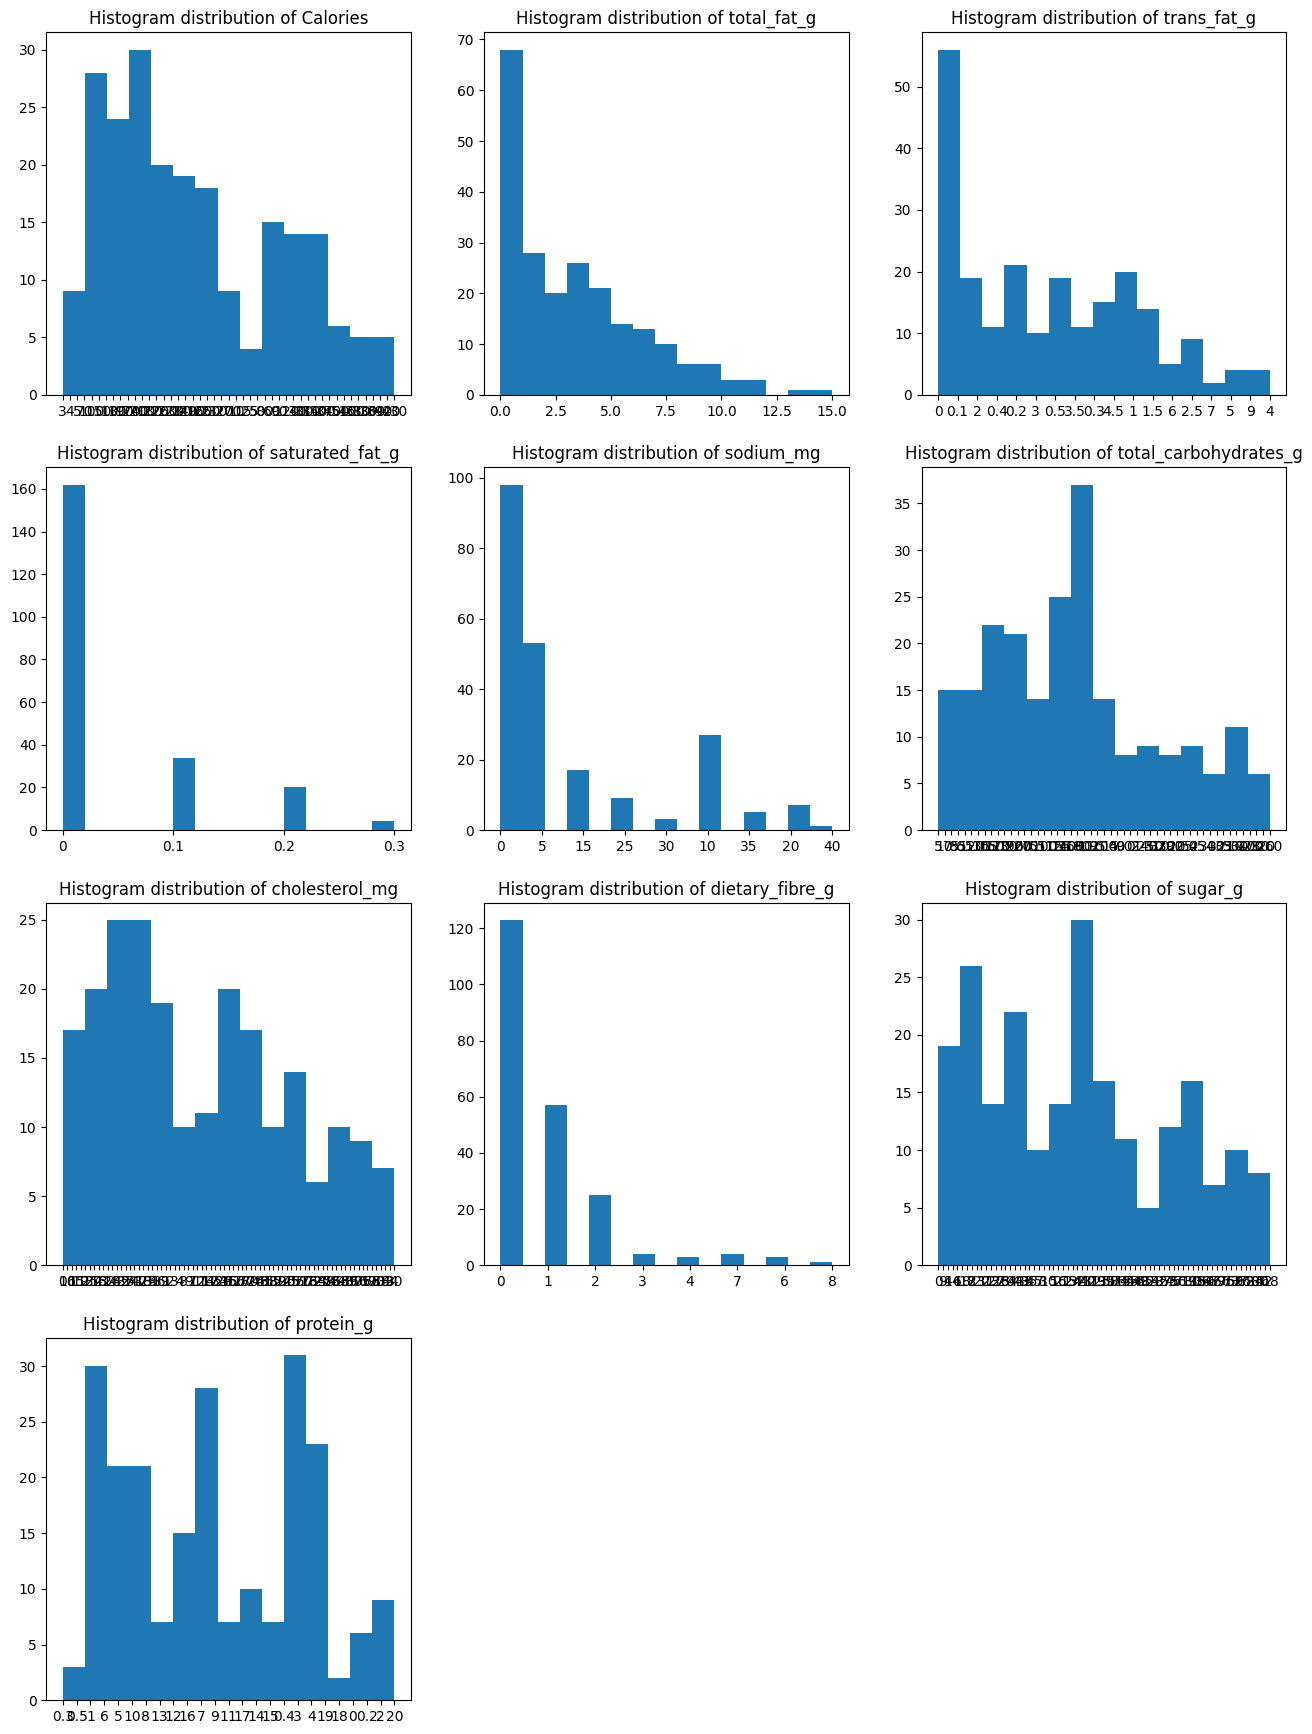

In [20]:
# Histogram for numerical columns
plt.figure(figsize=(16, 12))
for i, column in zip(range(1, 11), numerical_columns):
    plt.subplot(4, 3, i)
    plt.subplots_adjust(right=0.9, top=1.5)
    plt.hist(df_pandas[column], bins=15)
    plt.title('Histogram distribution of {}'.format(column))

plt.show()

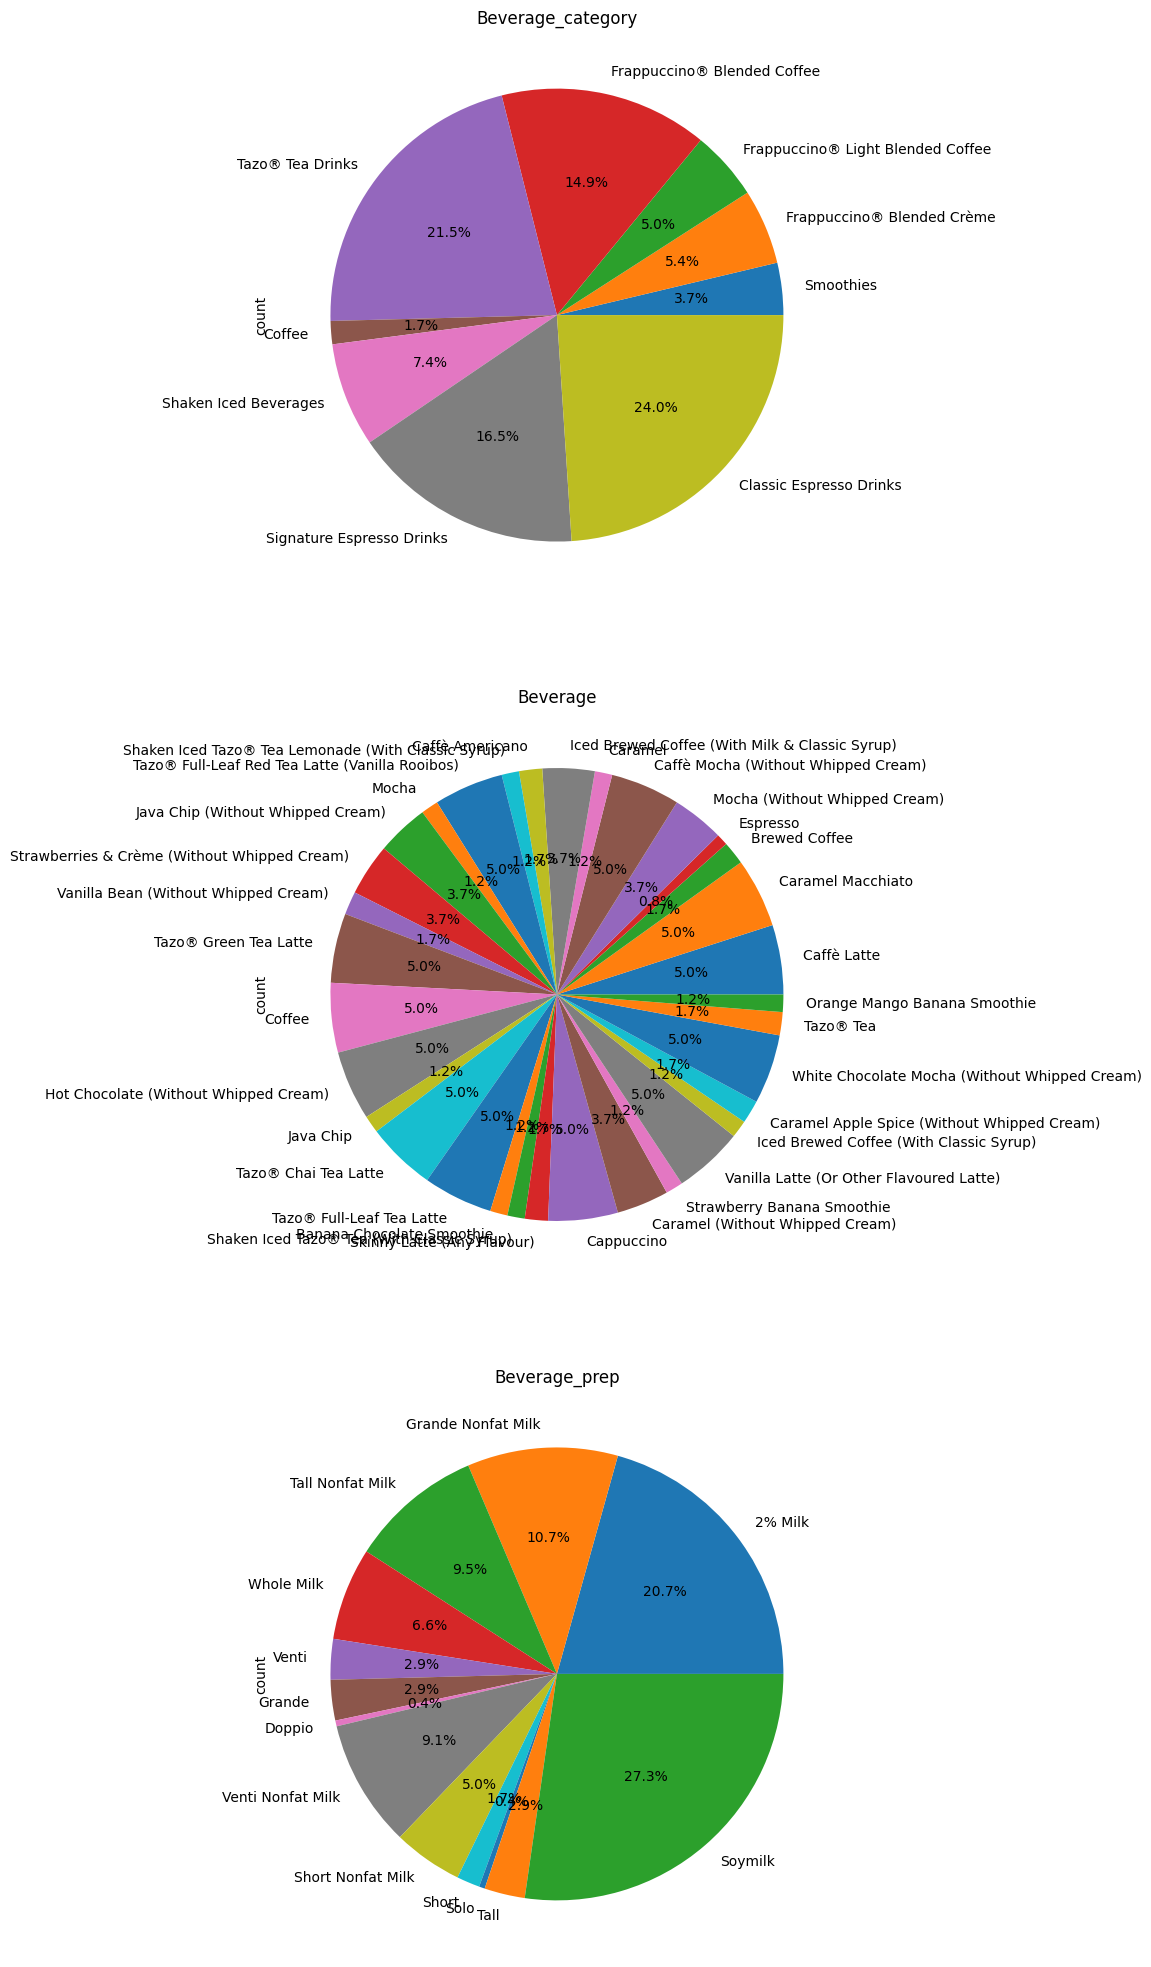

In [21]:
# Pie Chart for categorical Columns
columns_cat=['Beverage_category', 'Beverage', 'Beverage_prep']

fig, axes = plt.subplots(3, 1, figsize=(25, 25))

for i, column in enumerate(columns_cat):
    ax = axes[i]
    df.select(column).groupBy(column).count().toPandas().set_index(column).plot.pie(y='count', autopct='%1.1f%%', ax=ax, legend=False)
    ax.set_title(column)

plt.show()

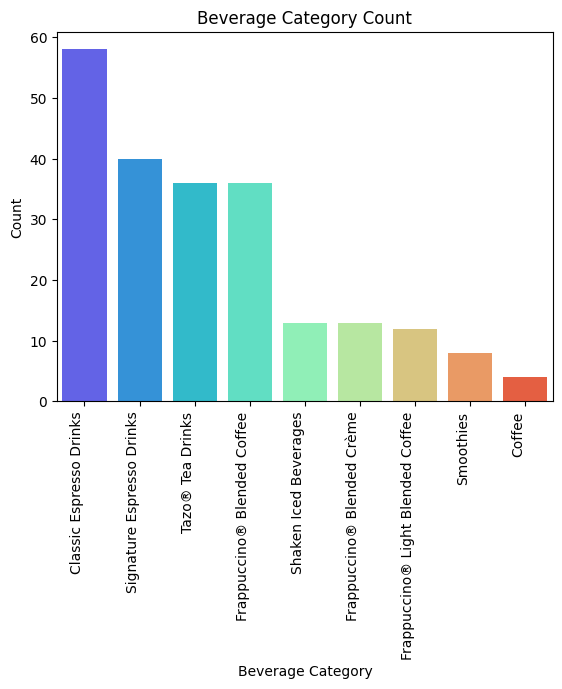

In [26]:
# Bar PLot for Beverage Categories

beverage_ctg_df = df_pandas['Beverage_category'].value_counts()

sns.barplot(x=beverage_ctg_df.index, y=beverage_ctg_df, palette='rainbow')

plt.xlabel('Beverage Category')
plt.ylabel('Count')
plt.title('Beverage Category Count')
plt.xticks(rotation=90, ha='right')
plt.show()

♦ The barplot shows the count of each unique value in the "Beverage_category" column, using a rainbow color palette for better visualization.

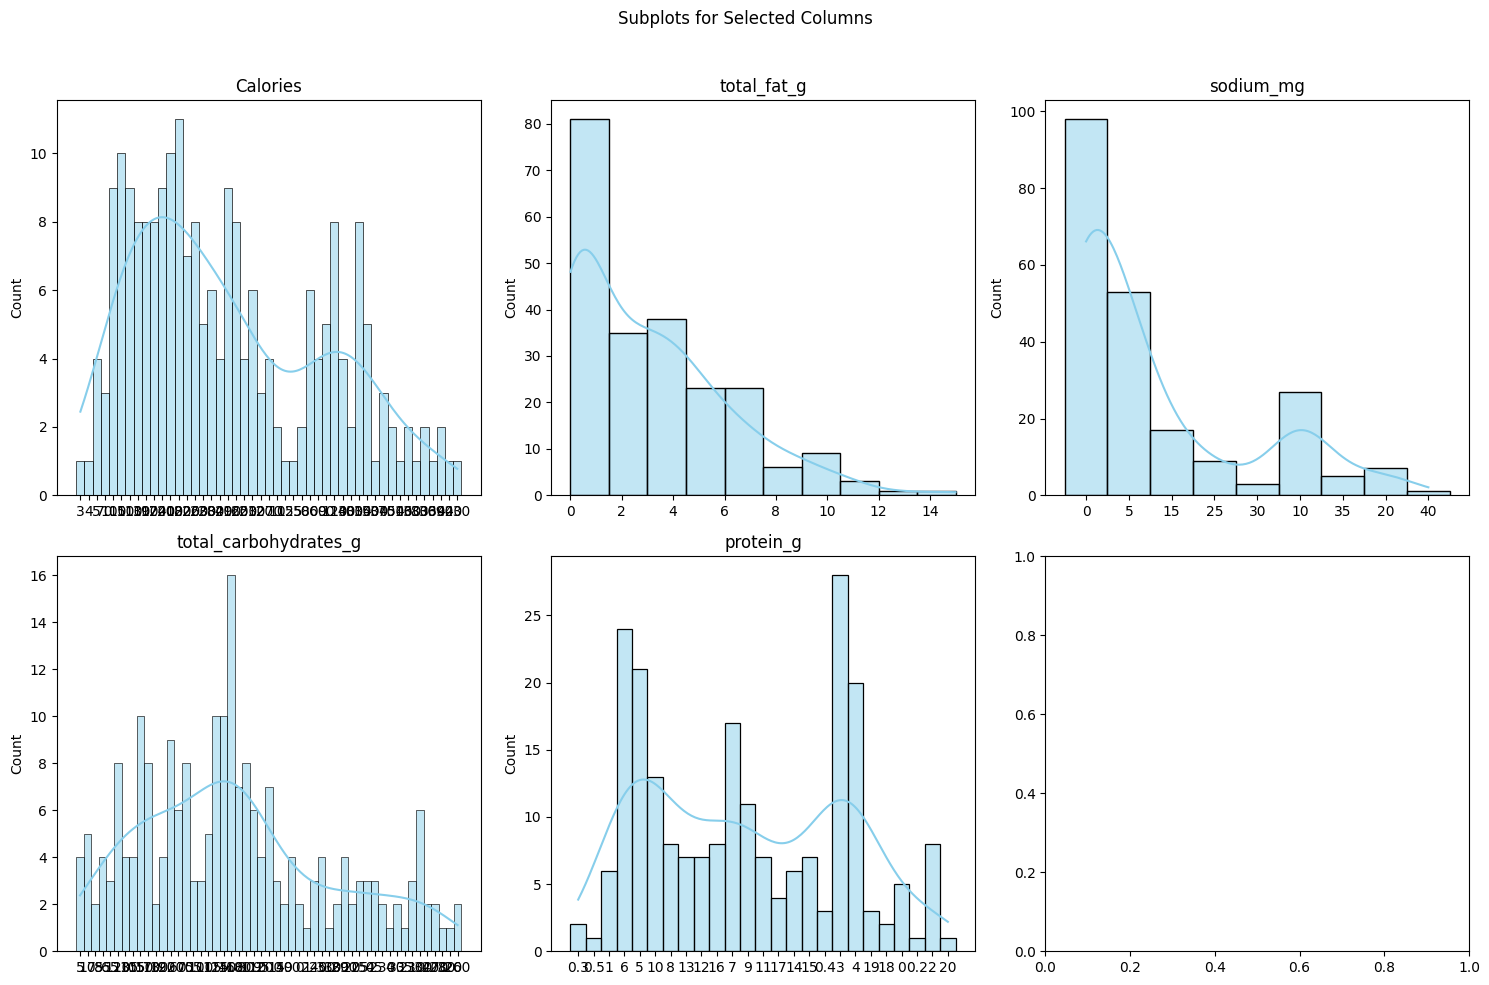

In [31]:
# HistPlots

selected_columns = ['Calories', 'total_fat_g', 'sodium_mg', 'total_carbohydrates_g', 'protein_g']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Subplots for Selected Columns')

# Plot each column
for i, col in enumerate(selected_columns):
    row_idx = i // 3
    col_idx = i % 3
    sns.histplot(df_pandas[col], kde=True, color='skyblue', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
    axes[row_idx, col_idx].set_xlabel('')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

♦ The histograms show the distribution of various nutritional components across different beverages.

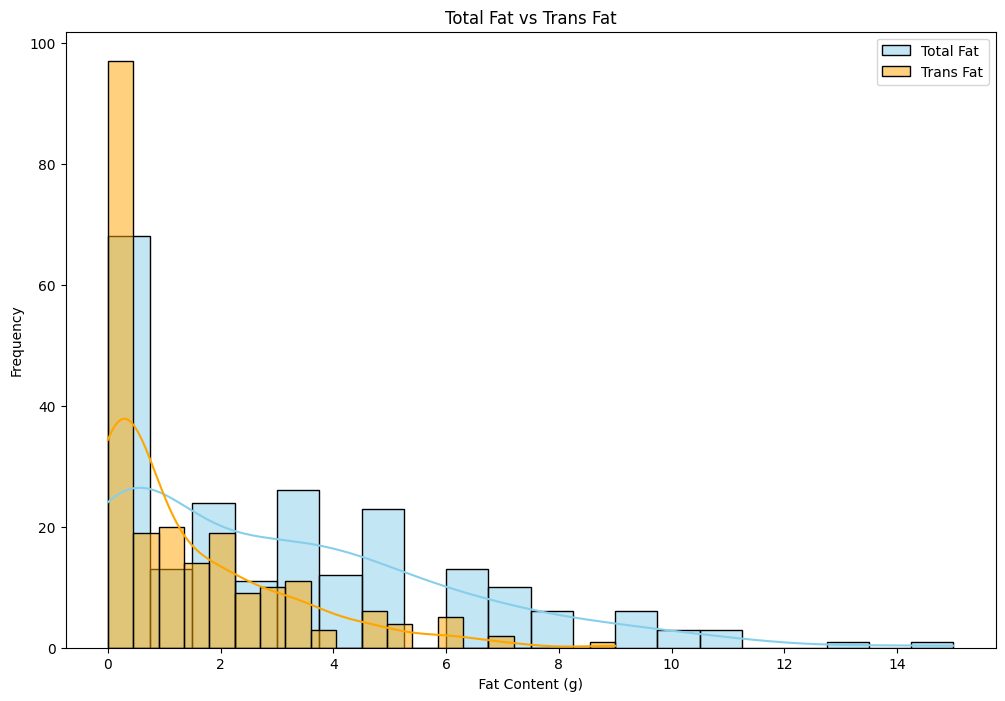

In [35]:
max_cal =df_pandas.loc[(df_pandas.caffeine_mg > 400)]
max_cal
# Hist Plot for Total-Fat and Trans-Fat Distribution
plt.figure(figsize=(12,8))
sns.histplot(df_pandas['total_fat_g'], kde=True, label='Total Fat', color='skyblue', bins=20)
sns.histplot(df_pandas['trans_fat_g'], kde=True, label='Trans Fat', color='orange', bins=20)

plt.xlabel(' Fat Content (g) ')
plt.ylabel('Frequency')
plt.title('Total Fat vs Trans Fat')
plt.legend()
plt.show()

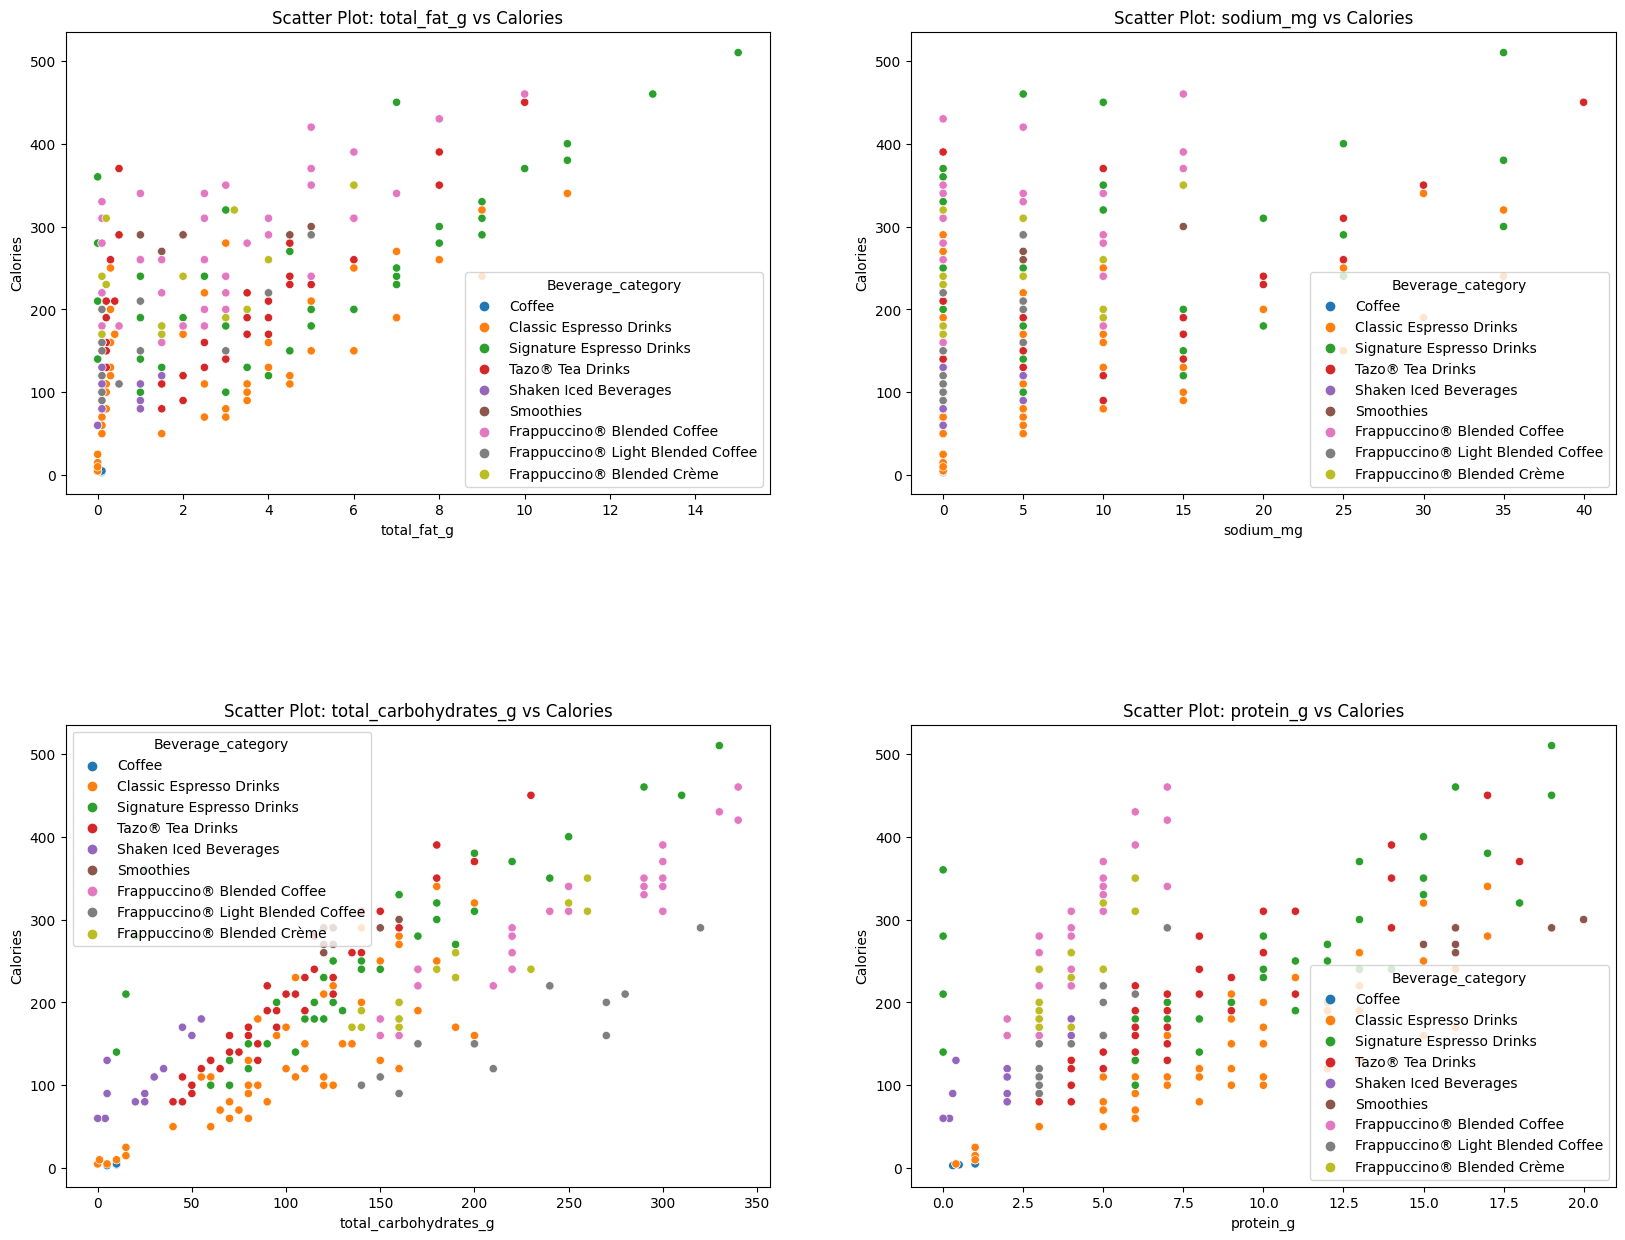

In [39]:
# Columns for scatter plots
scatter_columns = ['total_fat_g', 'sodium_mg', 'total_carbohydrates_g', 'protein_g']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
fig.subplots_adjust(hspace=0.5)

# Plot scatter plots for each column
for i, column in enumerate(scatter_columns):
    ax = axes.flatten()[i]
    sns.scatterplot(x=column, y='Calories', hue='Beverage_category',
                    data=df_pandas, ax=ax)
    ax.set_title(f'Scatter Plot: {column} vs Calories')

plt.show()

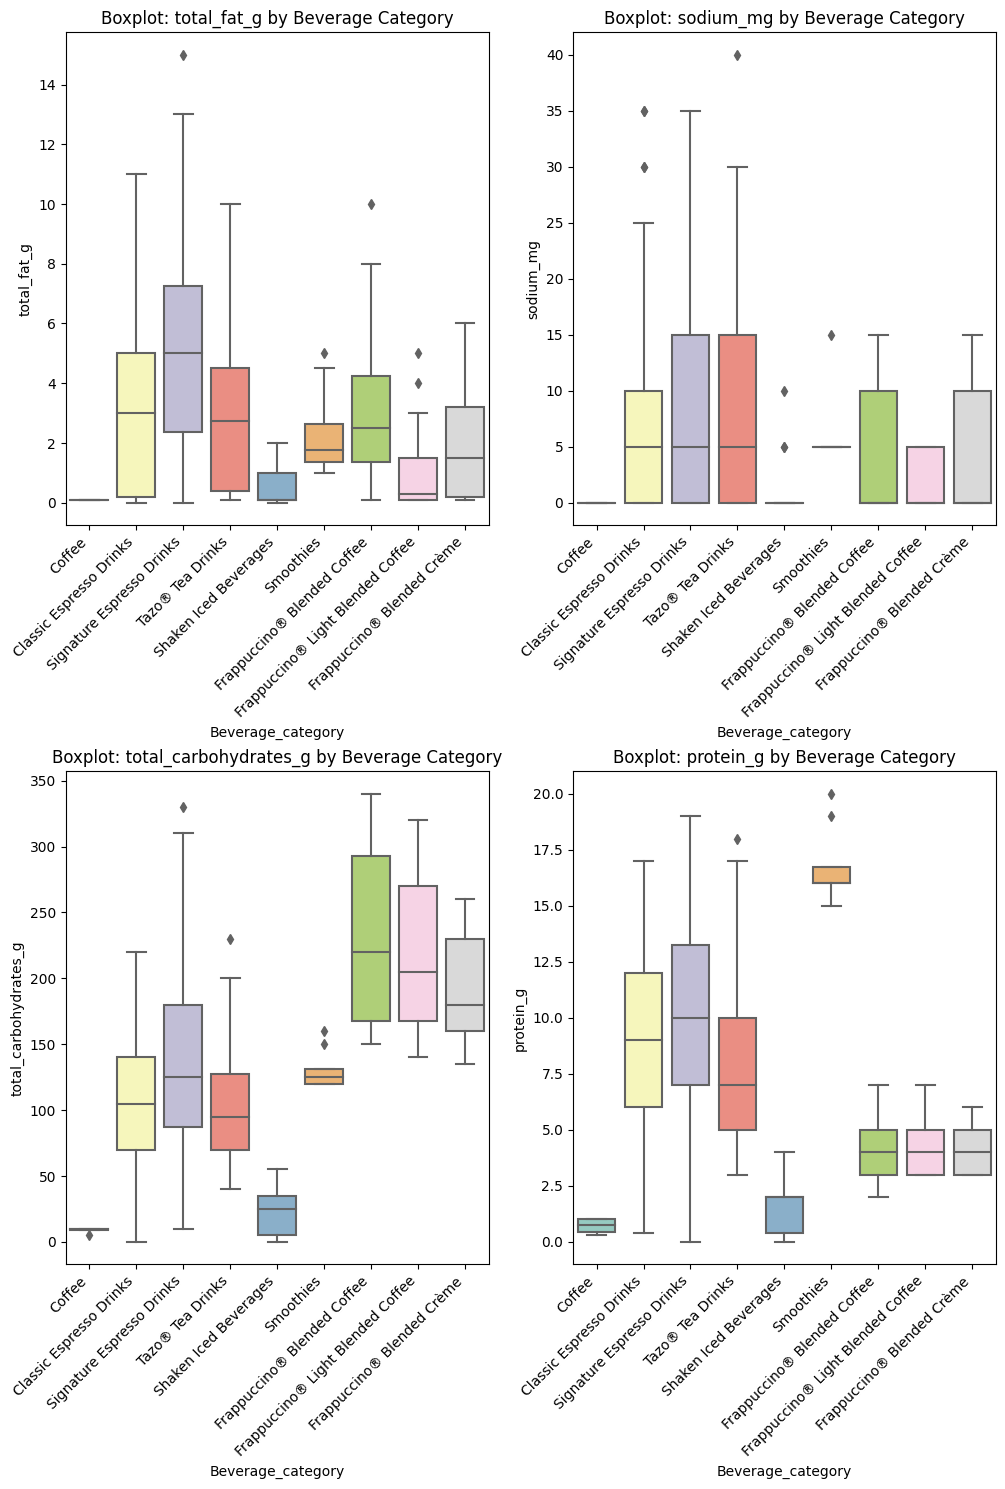

In [42]:
# Columns for box plots
boxplot_columns = ['total_fat_g', 'sodium_mg', 'total_carbohydrates_g', 'protein_g']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 16))
fig.subplots_adjust(hspace=0.5)

# Plot boxplots for each column
for i, column in enumerate(boxplot_columns):
    ax = axes.flatten()[i]
    sns.boxplot(x='Beverage_category', y=column, data=df_pandas, ax=ax, palette='Set3')
    ax.set_title(f'Boxplot: {column} by Beverage Category')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.show()

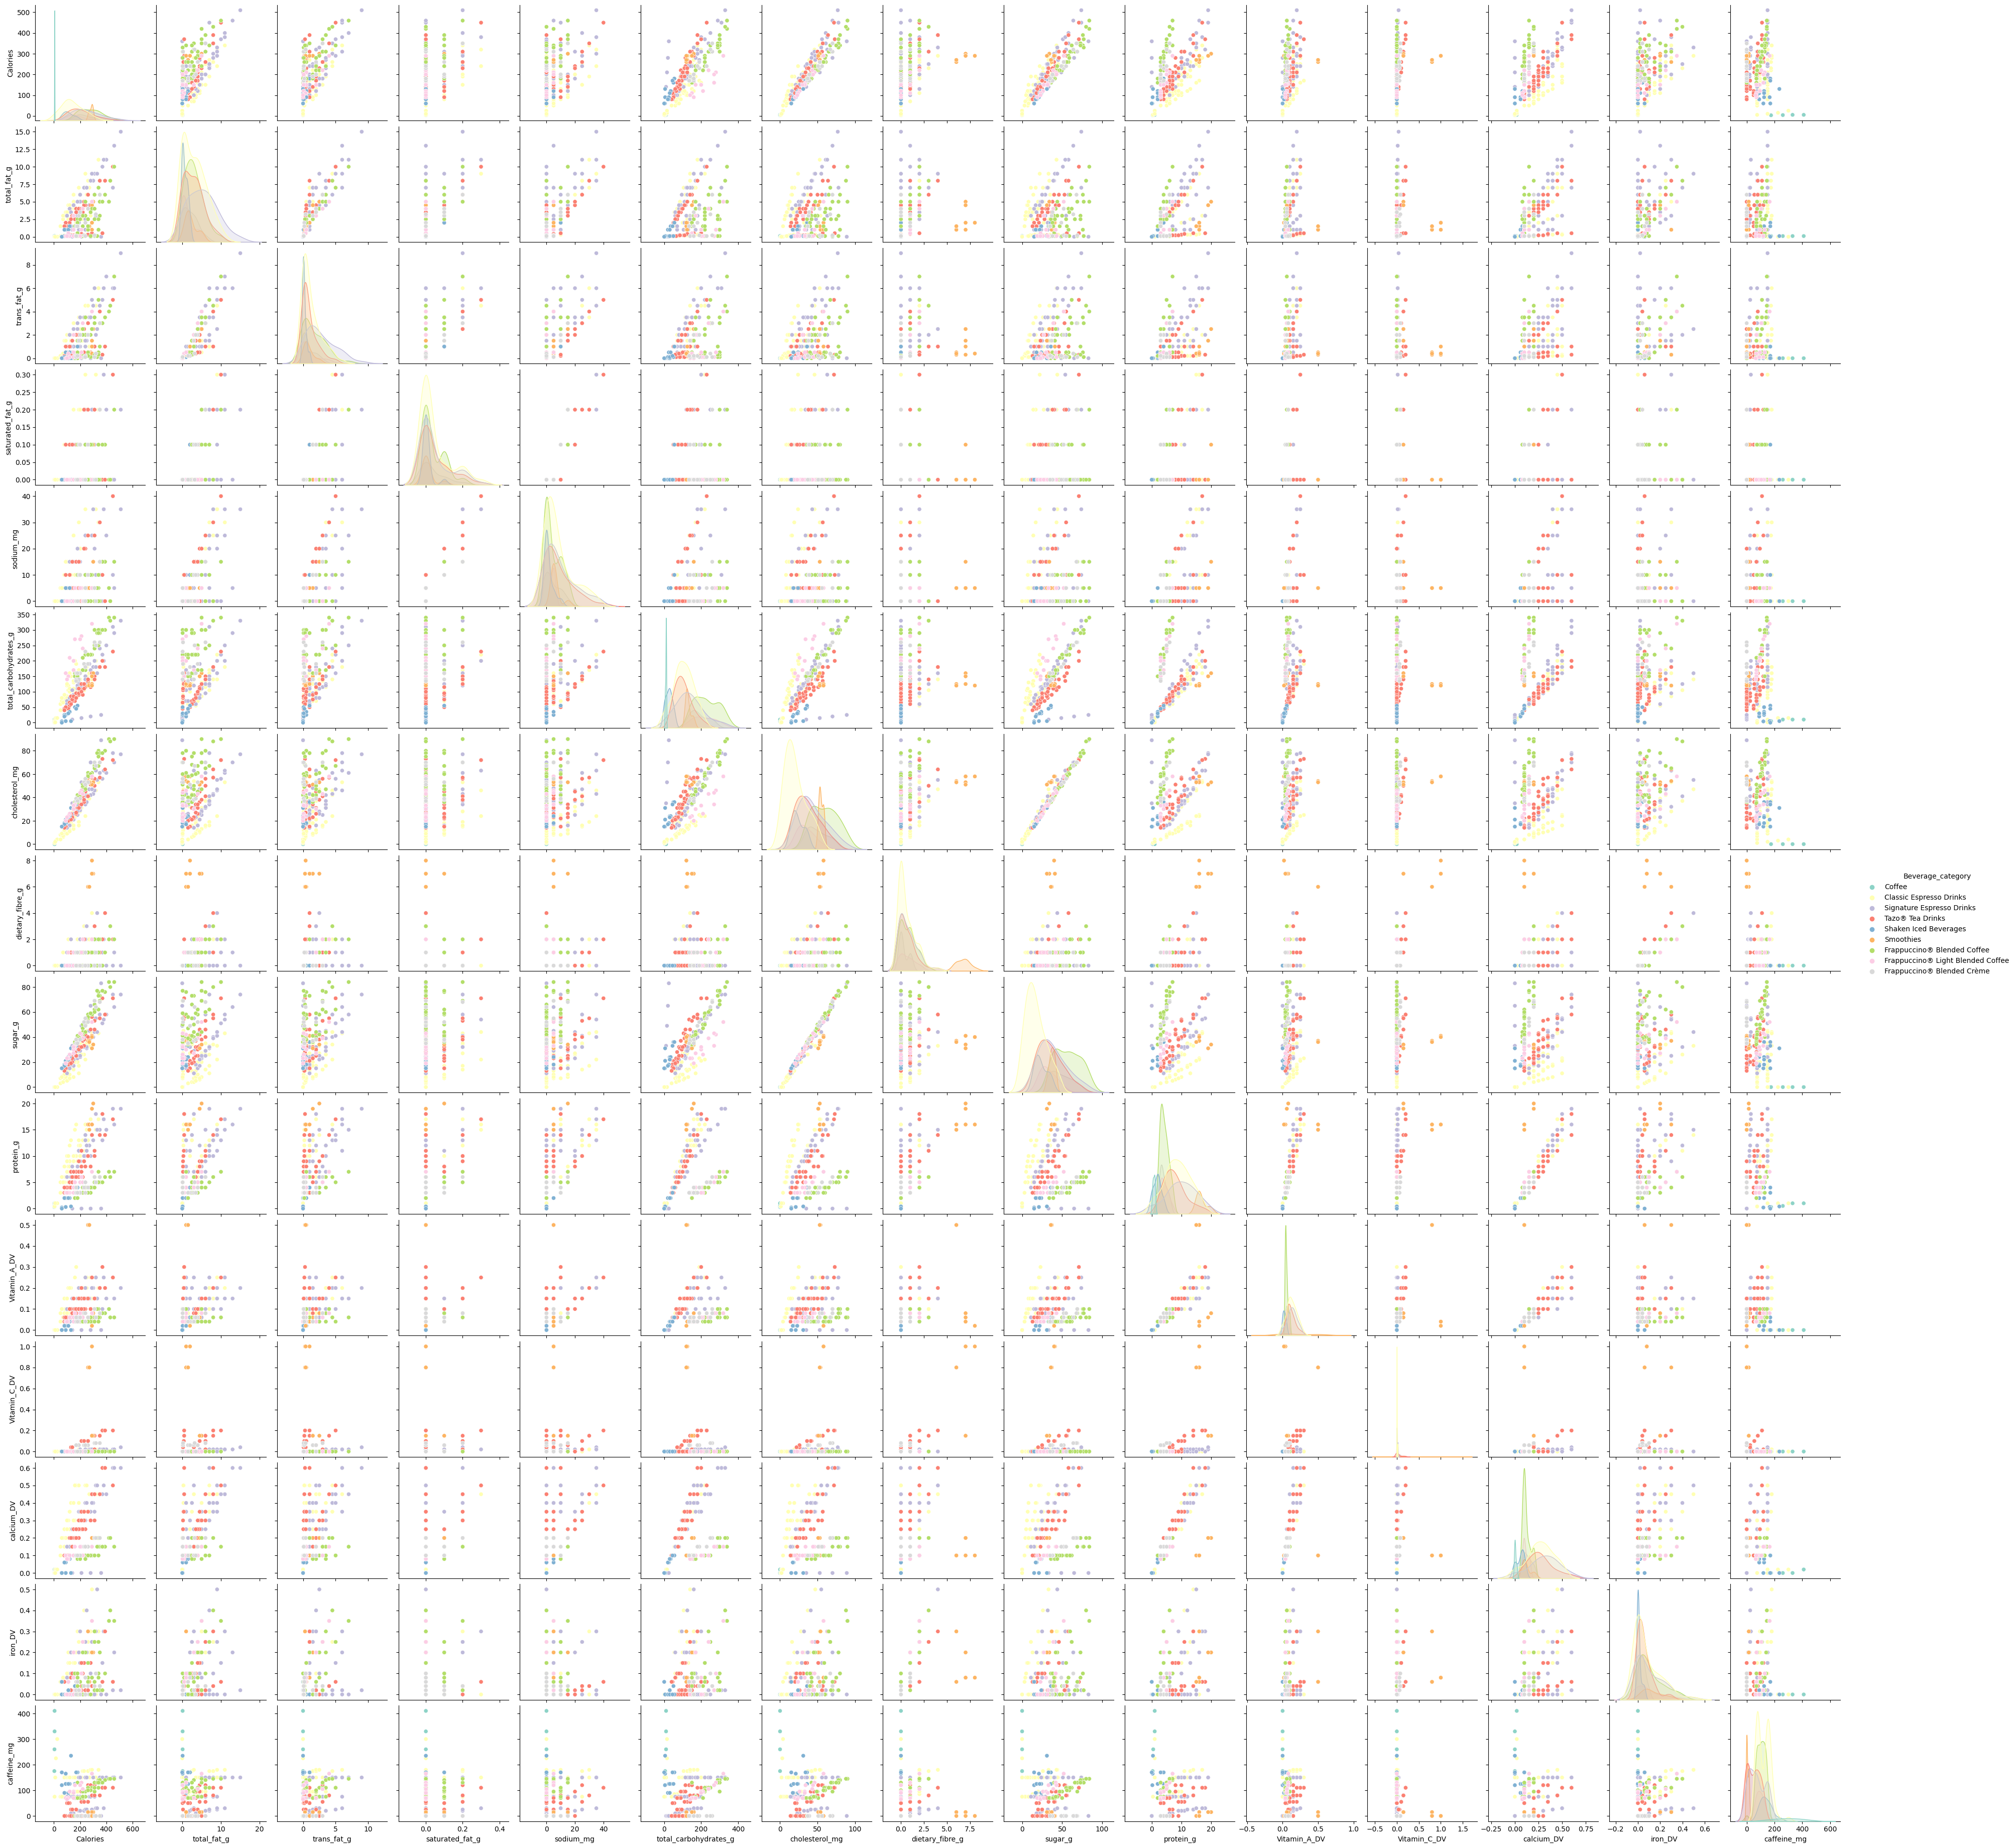

In [43]:
# Pair plot
sns.pairplot(df_pandas, hue='Beverage_category', palette='Set3')
plt.show()

♦ Pair plots show pairwise relationships between numerical variables

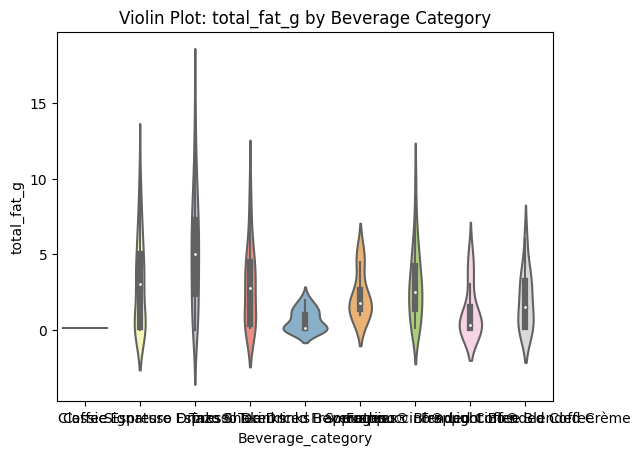

In [44]:
# Violin Plots
sns.violinplot(x='Beverage_category', y='total_fat_g', data=df_pandas, palette='Set3')
plt.title('Violin Plot: total_fat_g by Beverage Category')
plt.show()

♦ Violin plots combine aspects of box plots and kernel density plots to provide a richer description of the distribution.

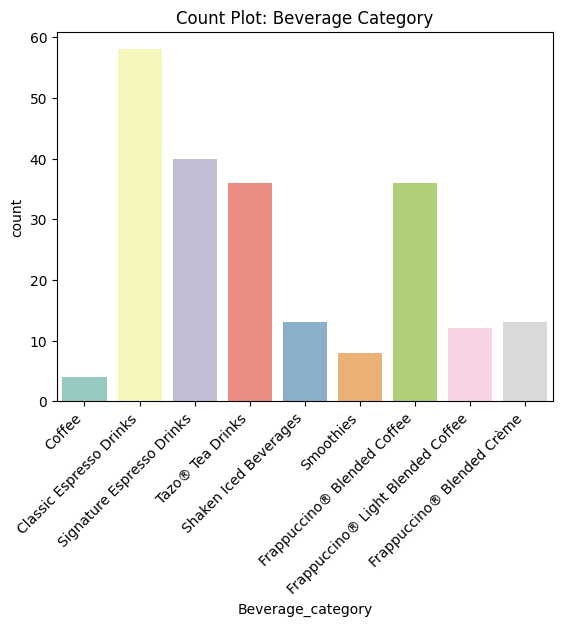

In [45]:
# Count Plot
sns.countplot(x='Beverage_category', data=df_pandas, palette='Set3')
plt.title('Count Plot: Beverage Category')
plt.xticks(rotation=45, ha='right')
plt.show()

♦ Count plots show the counts of observations in each category.

<ipython-input-47-863ec020b5e7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_pandas.corr()


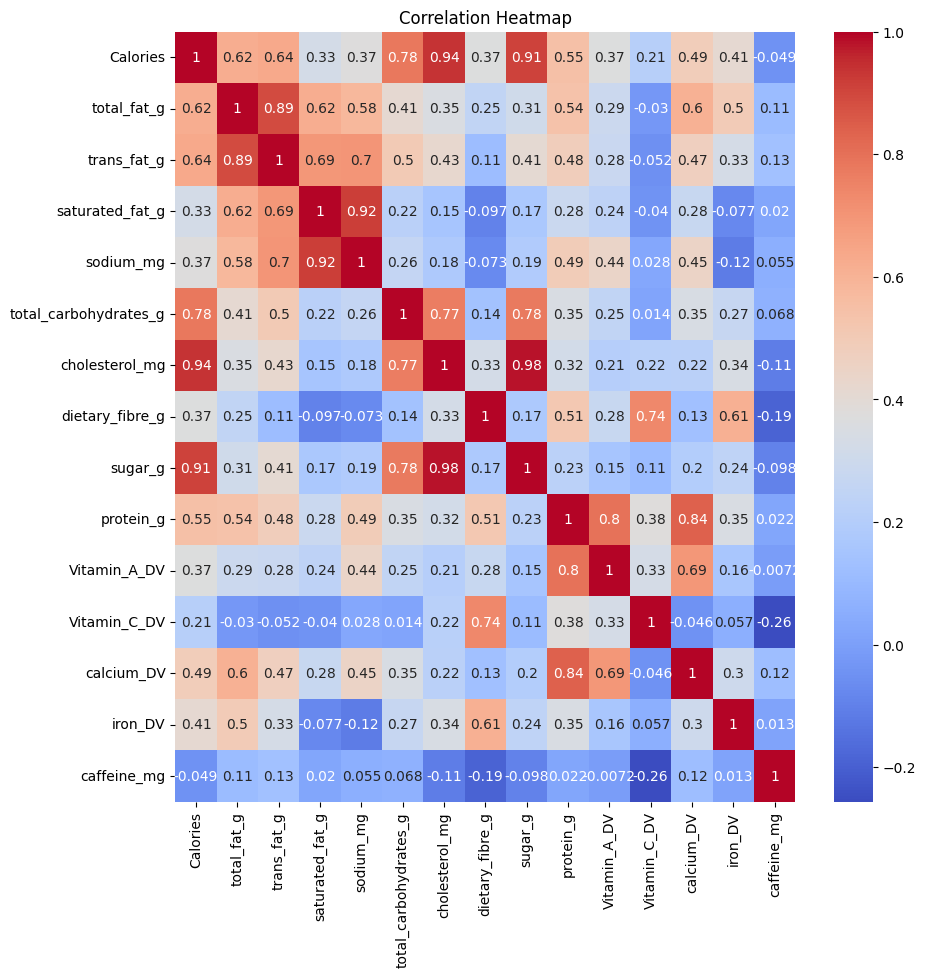

In [47]:
#Heatmap
plt.figure(figsize=(10,10))
correlation_matrix = df_pandas.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

♦ Heatmaps visualize the correlation between numerical variables.

In [48]:
correlation_matrix

Calories  total_fat_g  trans_fat_g  saturated_fat_g  \
Calories               1.000000     0.620398     0.635440         0.325883   
total_fat_g            0.620398     1.000000     0.888990         0.617329   
trans_fat_g            0.635440     0.888990     1.000000         0.692065   
saturated_fat_g        0.325883     0.617329     0.692065         1.000000   
sodium_mg              0.373547     0.579806     0.700684         0.919855   
total_carbohydrates_g  0.783966     0.413336     0.501018         0.221753   
cholesterol_mg         0.937914     0.352564     0.425532         0.152413   
dietary_fibre_g        0.369126     0.251997     0.114838        -0.097154   
sugar_g                0.908817     0.310916     0.407348         0.169382   
protein_g              0.546193     0.538515     0.481984         0.284562   
Vitamin_A_DV           0.370343     0.291009     0.278956         0.236087   
Vitamin_C_DV           0.213281    -0.030059    -0.052110        -0.040370   
calcium_DV             0.485662     0.604520     0.474276         0.275462   
iron_DV                0.412398     0.497957     0.332285        -0.076925   
caffeine_mg           -0.049418     0.109987     0.134770         0.019615   

                       sodium_mg  total_carbohydrates_g  cholesterol_mg  \
Calories                0.373547               0.783966        0.937914   
total_fat_g             0.579806               0.413336        0.352564   
trans_fat_g             0.700684               0.501018        0.425532   
saturated_fat_g         0.919855               0.221753        0.152413   
sodium_mg               1.000000               0.261393        0.180294   
total_carbohydrates_g   0.261393               1.000000        0.766888   
cholesterol_mg          0.180294               0.766888        1.000000   
dietary_fibre_g        -0.072995               0.137311        0.327712   
sugar_g                 0.187675               0.778874        0.984795   
protein_g               0.493479               0.347696        0.319000   
Vitamin_A_DV            0.443378               0.252863        0.205931   
Vitamin_C_DV            0.027560               0.013829        0.215518   
calcium_DV              0.450064               0.346772        0.223095   
iron_DV                -0.117456               0.271779        0.343735   
caffeine_mg             0.055436               0.067539       -0.113661   

                       dietary_fibre_g   sugar_g  protein_g  Vitamin_A_DV  \
Calories                      0.369126  0.908817   0.546193      0.370343   
total_fat_g                   0.251997  0.310916   0.538515      0.291009   
trans_fat_g                   0.114838  0.407348   0.481984      0.278956   
saturated_fat_g              -0.097154  0.169382   0.284562      0.236087   
sodium_mg                    -0.072995  0.187675   0.493479      0.443378   
total_carbohydrates_g         0.137311  0.778874   0.347696      0.252863   
cholesterol_mg                0.327712  0.984795   0.319000      0.205931   
dietary_fibre_g               1.000000  0.173207   0.513766      0.277790   
sugar_g                       0.173207  1.000000   0.225940      0.151388   
protein_g                     0.513766  0.225940   1.000000      0.798396   
Vitamin_A_DV                  0.277790  0.151388   0.798396      1.000000   
Vitamin_C_DV                  0.735675  0.107505   0.380051      0.331044   
calcium_DV                    0.127140  0.197566   0.841374      0.692906   
iron_DV                       0.611082  0.243955   0.350116      0.160488   
caffeine_mg                  -0.189605 -0.098402   0.022393     -0.007213   

                       Vitamin_C_DV  calcium_DV   iron_DV  caffeine_mg  
Calories                   0.213281    0.485662  0.412398    -0.049418  
total_fat_g               -0.030059    0.604520  0.497957     0.109987  
trans_fat_g               -0.052110    0.474276  0.332285     0.134770  
saturated_fat_g           -0.040370    0.275462 

from matplotlib import pyplot as plt
correlation_matrix['Calories'].plot(kind='hist', bins=20, title='Calories')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['total_fat_g'].plot(kind='hist', bins=20, title='total_fat_g')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['trans_fat_g'].plot(kind='hist', bins=20, title='trans_fat_g')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['saturated_fat_g'].plot(kind='hist', bins=20, title='saturated_fat_g')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='Calories', y='total_fat_g', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='total_fat_g', y='trans_fat_g', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='trans_fat_g', y='saturated_fat_g', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='saturated_fat_g', y='sodium_mg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['Calories'].plot(kind='line', figsize=(8, 4), title='Calories')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['total_fat_g'].plot(kind='line', figsize=(8, 4), title='total_fat_g')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['trans_fat_g'].plot(kind='line', figsize=(8, 4), title='trans_fat_g')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['saturated_fat_g'].plot(kind='line', figsize=(8, 4), title='saturated_fat_g')
plt.gca().spines[['top', 'right']].set_visible(False)

The correlation matrix reveals significant associations between nutritional components:

- **Calories:** Strongly positively correlated with various components, indicating their collective impact on caloric content.
  
- **Fat Components (total_fat_g, trans_fat_g, saturated_fat_g):** Show strong positive correlations, suggesting their co-occurrence.

- **Cholesterol_mg:** Strongly positively correlated with calories, total_fat_g, sodium_mg, total_carbohydrates_g, sugar_g, and protein_g.

- **Dietary Fiber (dietary_fibre_g):** Positively correlated with calories, total_carbohydrates_g, sugar_g, and protein_g.

- **Vitamins and Minerals (Vitamin_A_DV, Vitamin_C_DV, calcium_DV, iron_DV):** Exhibit positive correlations with specific components.

- **Caffeine_mg:** Weak correlations with other nutritional components, indicating independence.

These insights facilitate a concise understanding of the relationships within the dataset.

# Multicollinearity

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded = df_pandas.apply(label_encoder.fit_transform)

df_encoded = df_encoded.fillna(df_encoded.mean())

In [52]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)
df = pd.DataFrame(df_scaled, columns=df_encoded.columns)

In [53]:
# VIF Calculation
def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

vif = calculate_vif(df)
print(vif)

                 Variable         VIF
0       Beverage_category    2.135010
1                Beverage    1.933505
2           Beverage_prep    1.722163
3                Calories   79.967445
4             total_fat_g   21.305465
5             trans_fat_g   16.477401
6         saturated_fat_g   14.938763
7               sodium_mg   21.043810
8   total_carbohydrates_g    4.823025
9          cholesterol_mg  318.267176
10        dietary_fibre_g   15.151544
11                sugar_g  297.328618
12              protein_g   32.377551
13           Vitamin_A_DV    6.401092
14           Vitamin_C_DV    4.109655
15             calcium_DV   23.935142
16                iron_DV    5.838188
17            caffeine_mg    1.874365


♦ **Key observations:**

* Calories (`VIF: 79.97`): Indicates high multicollinearity, suggesting strong correlation with other predictors.

* Cholesterol_mg (`VIF: 318.27`) and Sugar_g (`VIF: 297.33`): Extremely high VIF values, indicating severe multicollinearity issues. These variables are highly correlated with other predictors.

* Protein_g (`VIF: 32.38`): Shows moderate multicollinearity.

* Other Variables: Generally exhibit acceptable VIF values, suggesting lower correlation among them.

---

# **Descriptive Summary**

## **Dataset Overview:**

The dataset under consideration contains comprehensive information about various beverages, including details on nutritional components such as calories, fats, sodium, carbohydrates, proteins, and more. The dataset was loaded into a PySpark DataFrame for efficient processing.

## **Data Cleaning and Standardization:**

Our initial steps involved data cleaning and standardization to ensure the dataset's integrity and uniformity. This included handling missing values, renaming columns for clarity, and converting percentage values to numeric format for consistency.

## **Descriptive Statistics:**

Descriptive statistics were employed to gain a deeper understanding of the dataset's central tendency and variability in numerical columns. This step provided essential insights into the distribution and characteristics of key nutritional components.

## **Data Visualization:**

* ### **Histograms:**

A series of histograms were created to visualize the distribution of key nutritional components. This visual representation allowed us to observe patterns and variations in the dataset, aiding in the identification of outliers and trends.

* ### **Pie Chart:**

A pie chart was generated to illustrate the distribution of beverage categories. This visualization provided a quick and intuitive overview of the dataset, highlighting the prevalence of different beverage types.

* ### **Scatter Plots:**

Scatter plots were utilized to explore potential relationships between selected nutritional components and caloric content. This visual analysis enabled us to identify potential correlations and patterns within the dataset.

* ### **Box Plots:**

Box plots were employed to visualize the spread of nutritional components across different beverage categories. This graphical representation facilitated the identification of variations and outliers, contributing to a comprehensive understanding of the dataset.

* ### **Additional Plots:**

Additional visualizations, including violin plots, count plots, and a correlation heatmap, were explored to provide a holistic view of the dataset. These visual aids further enhanced our understanding of the interplay between different variables.

## **Conclusion:**

In conclusion, this analysis aimed to unravel the nutritional landscape of various beverages through a combination of descriptive statistics and visualizations. The comprehensive exploration of the dataset has set the stage for more advanced analyses, including machine learning modeling and in-depth statistical examinations.

---